In [1]:
import functools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Setting up a random number generator with a fixed state for reproducibility.
rng = np.random.default_rng(seed=19680801)
# Fixing bin edges.
HIST_BINS = np.linspace(-4, 4, 100)

# Histogram our data with numpy.
data = rng.standard_normal(1000)
n, _ = np.histogram(data, HIST_BINS)

In [2]:
def animate(frame_number, bar_container):
    # Simulate new data coming in.
    data = rng.standard_normal(1000)
    n, _ = np.histogram(data, HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches

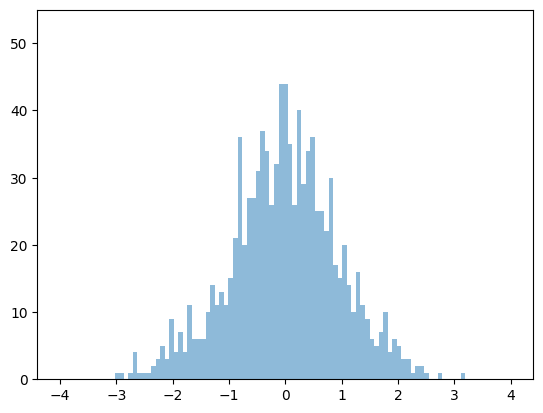

In [3]:
# Output generated via `matplotlib.animation.Animation.to_jshtml`.

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

anim = functools.partial(animate, bar_container=bar_container)
ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)
plt.show()

In [4]:
from IPython.display import HTML

In [5]:
HTML(ani.to_jshtml())
